#Aula 1


In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
resenha = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Di2Win/Alura_3/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, 
                                                              resenha.sentiment,
                                                              random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
regressao_log = LogisticRegression()

In [8]:
classificacao = resenha.sentiment.replace(['neg', 'pos'], [0,1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [9]:
resenha['classificacao'] = classificacao
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


#Aula 2

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [18]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [20]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [22]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [28]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                                texto[coluna_classificacao],
                                                                random_state=42)

  regressao_log = LogisticRegression()
  regressao_log.fit(treino, classe_treino)
  acuracia = regressao_log.score(teste, classe_teste) * 100
  print("Acuracia: %.2f" %acuracia)

In [29]:
classificar_texto(resenha,"text_pt", "classificacao")

Acuracia: 65.83


#Aula 3

In [32]:
%matplotlib inline
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])


In [43]:
nuvem_palavras = WordCloud(width=800, height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)

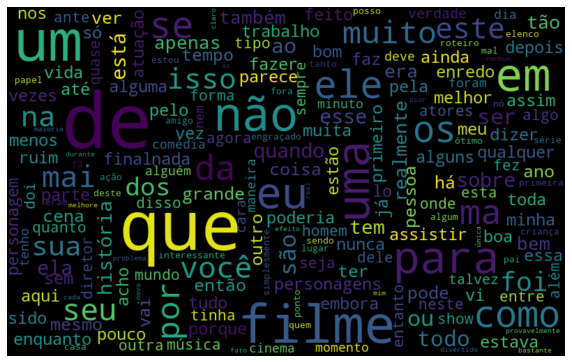

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
def nuvem_palavras(texto, coluna_texto, sentimento):
  if sentimento == 'neg':
    new_texto = texto.query("sentiment == 'neg'")
  else:
    new_texto = texto.query("sentiment == 'pos'")

  todas_palavras = ' '.join([texto for texto in new_texto[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500, 
                            max_font_size=110, 
                            collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

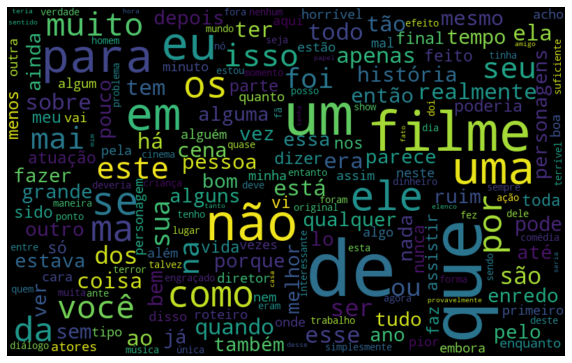

In [47]:
nuvem_palavras(resenha, "text_pt", 'neg')

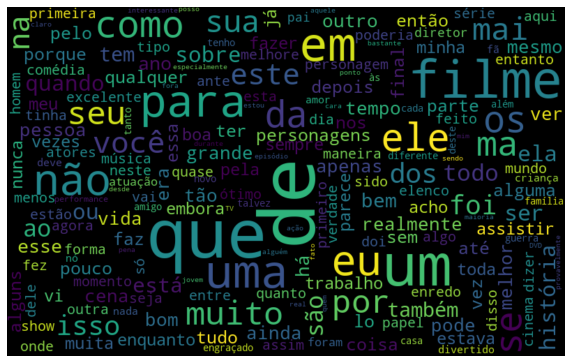

In [48]:
nuvem_palavras(resenha, "text_pt", 'pos')

# Aula 4

In [50]:
import nltk
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [52]:
from nltk import tokenize
frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [56]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame(({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())}))

In [58]:
df_frequencia.nlargest(columns="Frequencia", n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


#Aula 5

In [59]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


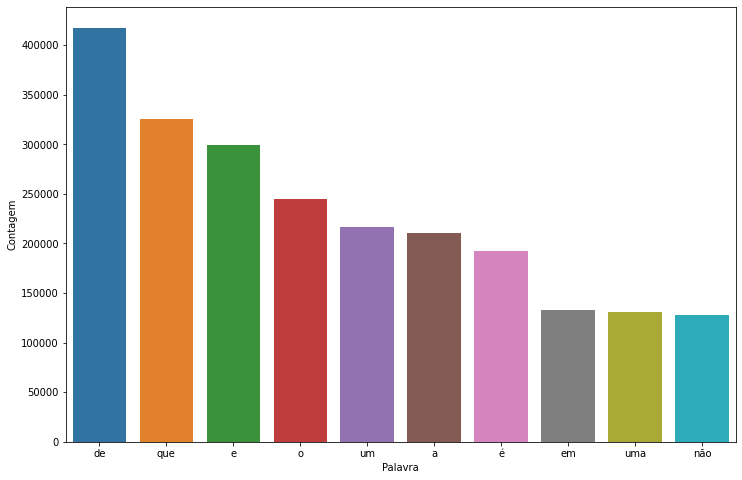

In [63]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_frequencia.nlargest(columns="Frequencia", n=10), x="Palavra", y="Frequencia")
ax.set(ylabel="Contagem")
plt.show()

In [64]:
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame(({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())}))
  df_frequencia = df_frequencia.nlargest(columns="Frequencia", n=quantidade)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequencia")
  ax.set(ylabel="Contagem")
  plt.show()

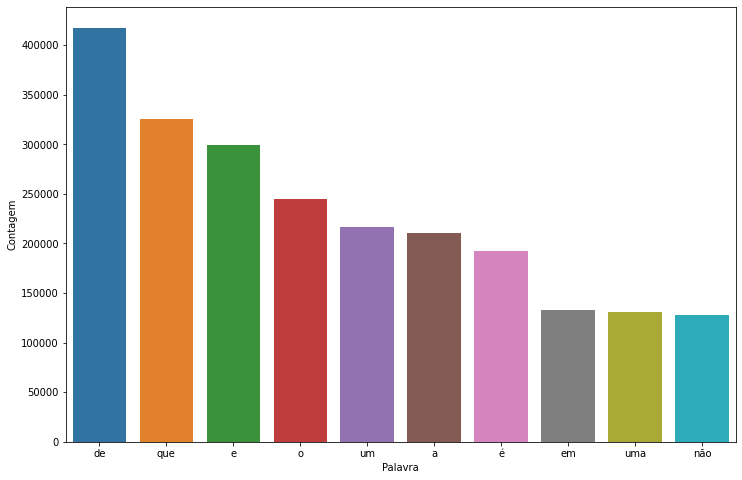

In [65]:
pareto(resenha, "text_pt", 10)

In [68]:
from nltk.corpus import stopwords
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [70]:
frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))
  
resenha["tratamento_1"] = frase_processada

In [71]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [72]:
classificar_texto(resenha, "tratamento_1", "classificacao")

Acuracia: 66.07


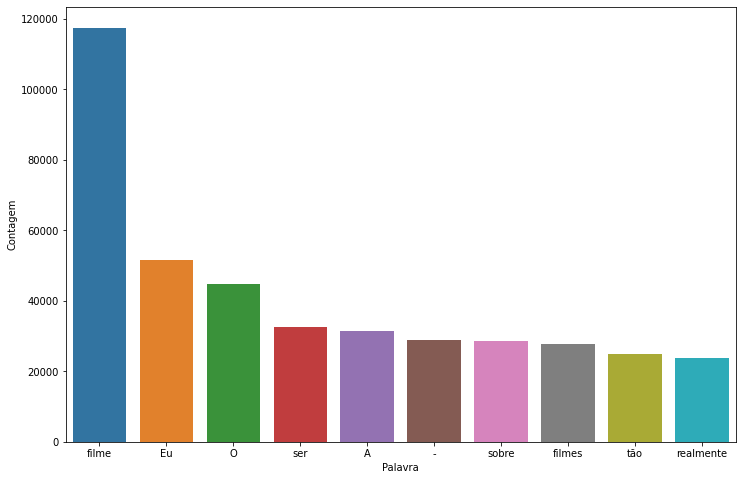

In [73]:
pareto(resenha, "tratamento_1", 10)